In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import Drangle

In [2]:
from Drangle import mch_95,mch_05,mch_15

Text(0.5, 0.98, 'Two Subplots: Strip and Scatter')

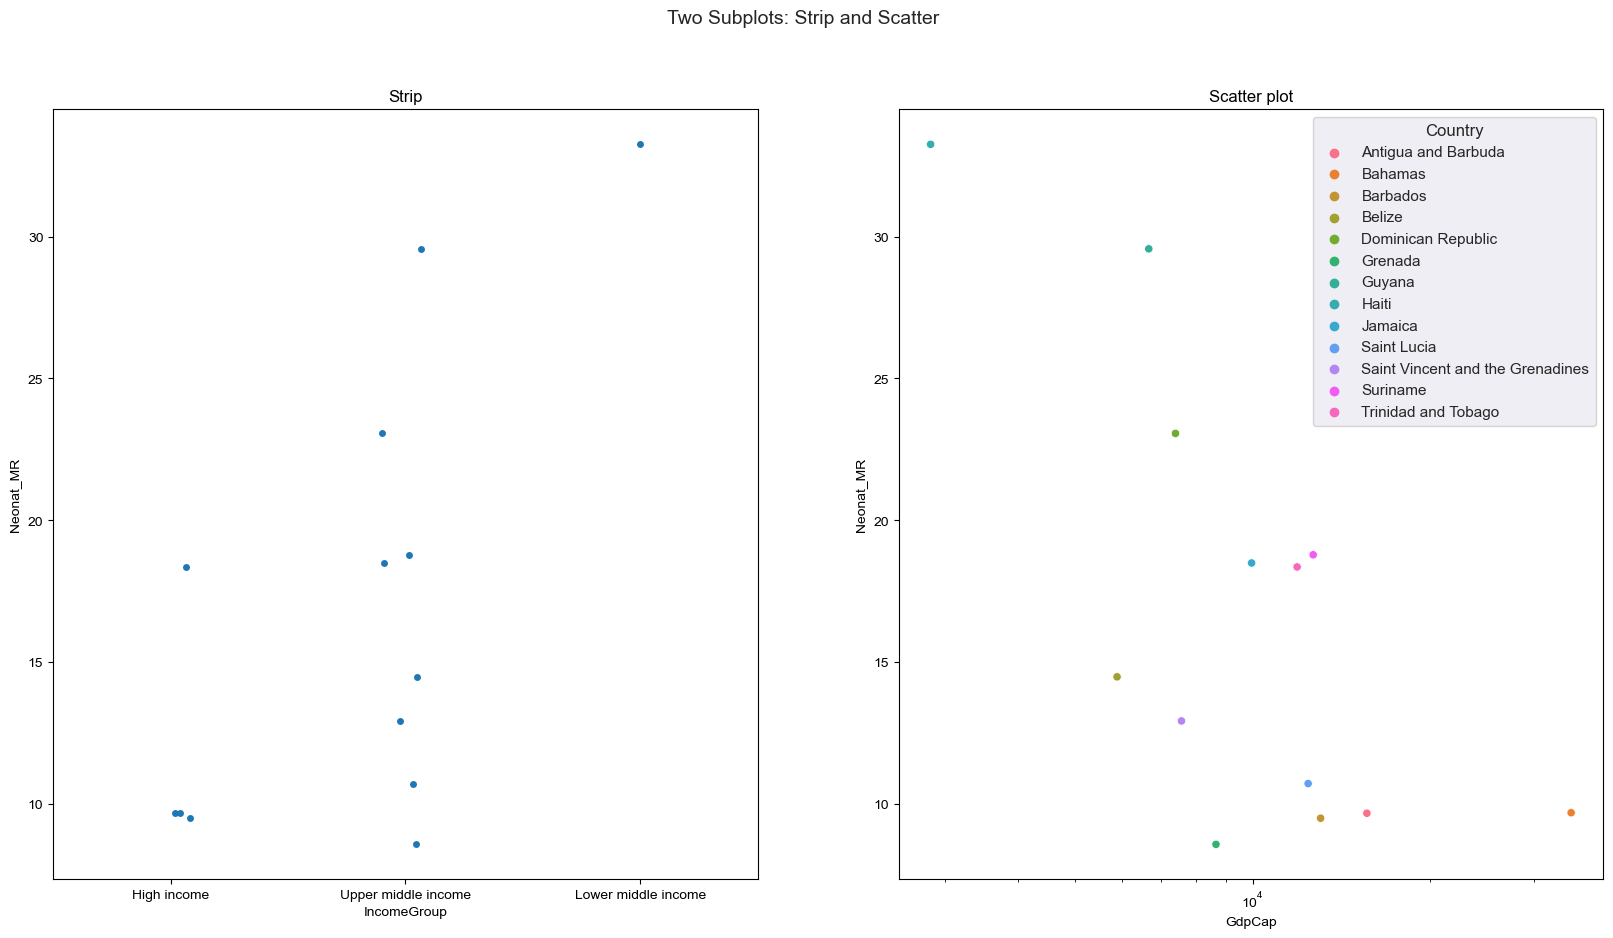

In [3]:
#Investigating GDP impact 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.set()
# Line plot
sns.stripplot(y ="Neonat_MR",x= "IncomeGroup", data=mch_95, ax=axes[0])
axes[0].set_title("Strip")

# Scatter plot
sns.scatterplot(x="GdpCap", y="Neonat_MR", hue="Country", data=mch_95, ax=axes[1].set_xscale('log'))
axes[1].set_title("Scatter plot")

# Set overall title and adjust spacing
fig.suptitle("Two Subplots: Strip and Scatter", fontsize=14)

In [4]:
#Investigating Policy 
def add_bool_pol_column(df):
    # Select columns with boolean dtype
    bool_cols = df.select_dtypes(include=bool)

    # Calculate total count of True values across boolean columns for each row
    total_count = bool_cols.sum(axis=1)

    # Add new column to original dataframe with the total count
    df['PolicyCount'] = total_count

    return df

#Creating tables for analysis with Policy Count 
NeoMR95 = add_bool_pol_column(mch_95)

def extract_4_cols(df, col1, col2, col3, col4):
    return df[[col1, col2, col3, col4]]
 
Neo95 = extract_4_cols(NeoMR95,"Country","GdpCap","Neonat_MR","PolicyCount")

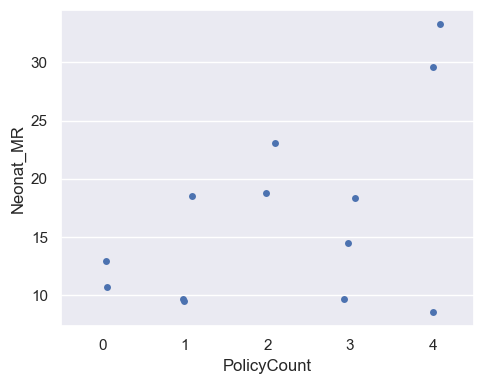

In [5]:
def plot_strip_subplots(df, y_vars):
    # Check if there is more than one y-variable
    if len(y_vars) > 1:
        # Set the number of rows and columns for the subplots
        n_rows = len(y_vars)
        n_cols = 1
    else:
        n_rows = 1
        n_cols = 1
    
    # Create the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5, 4))
    
    # Loop through the y_vars and create the scatter plots
    for i, y_var in enumerate(y_vars):
        if len(y_vars) > 1:
            ax = axes[i]
        else:
            ax = axes
        sns.stripplot(x='PolicyCount', y=y_var, data=df, ax=ax)
        ax.set_xlabel('PolicyCount')
        ax.set_ylabel(y_var)
    
    # Adjust the spacing between the subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
# Call the function
plot_strip_subplots(Neo95,["Neonat_MR"])

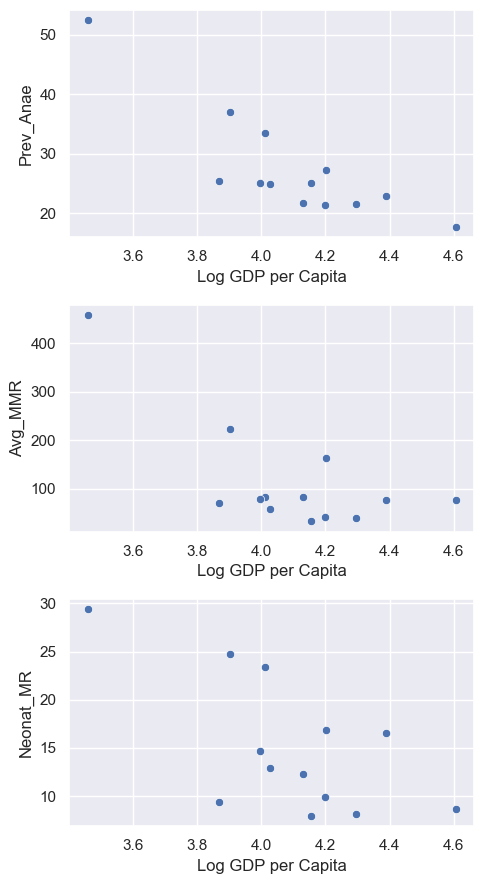

In [6]:
def gdp_subplots(df, y_vars):
    # Set the log scale for GDP per Capita
    df['log_gdp'] = df["GdpCap"].apply(lambda x: np.log10(x))
    
    # Set the number of rows and columns for the subplots
    n_rows = len(y_vars)
    n_cols = 1
    
    # Create the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5, 3 * n_rows))
    
    # Loop through the y_vars and create the scatter plots and line plots
    for i, y_var in enumerate(y_vars):
        ax = axes[i]
        
        # Scatter plot
        sns.scatterplot(x='log_gdp', y=y_var, data=df, ax=ax)
        
        # Set axis labels
        ax.set_xlabel('Log GDP per Capita')
        ax.set_ylabel(y_var)
        
    # Adjust the spacing between the subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
gdp_subplots(mch_05, ['Prev_Anae', 'Avg_MMR', 'Neonat_MR'])

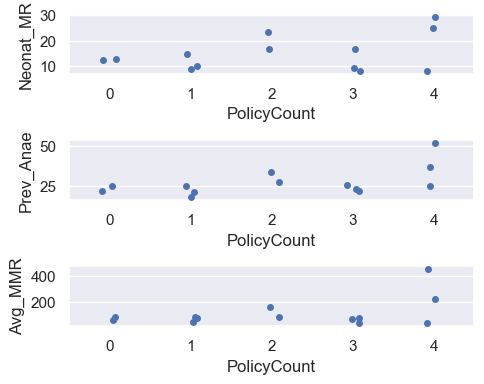

In [7]:
#Creating tables for analysis with Policy Count 
def extract_6_cols(df, col1, col2, col3,col4,col5,col6):
    return df[[col1, col2, col3,col4,col5,col6]]

Mch_05ind = add_bool_pol_column(mch_05)
Mch_05ind = extract_6_cols(Mch_05ind, "Country", 'Prev_Anae', 'Avg_MMR', 'Neonat_MR',"PolicyCount","IncomeGroup")

#Influnce of Policy 
plot_strip_subplots(Mch_05ind,["Neonat_MR",'Prev_Anae', 'Avg_MMR'])

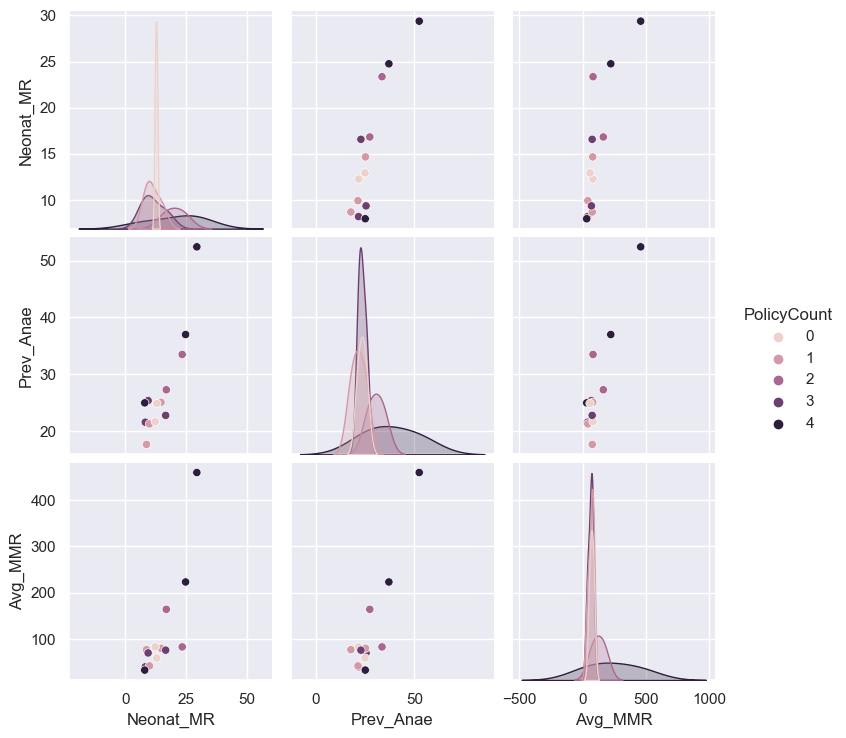

In [8]:
#Creating function to analyse various variables in a pairplot

def plot_pairplot(df, x_vars, hue=None):
    # Select the columns to use as x variables
    x_vars = x_vars[:3] # Only select the first three variables
    
    # Create the pairplot
    sns.pairplot(data=df, vars=x_vars, hue=hue)
    
    # Show the plot
    plt.show()
plot_pairplot(mch_05, ["Neonat_MR",'Prev_Anae', 'Avg_MMR'], hue='PolicyCount')


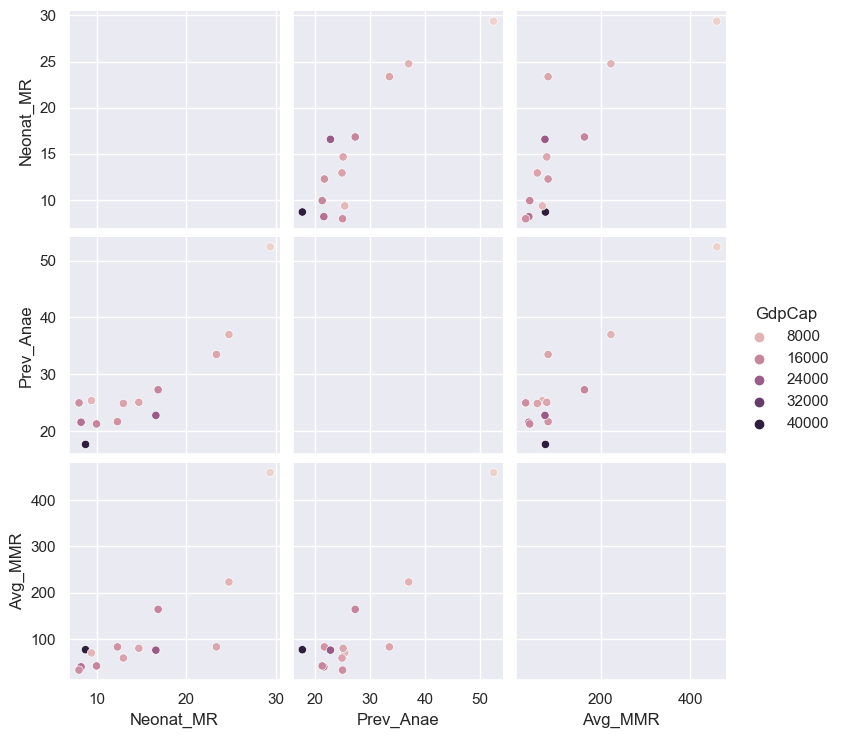

In [10]:
plot_pairplot(mch_05, ["Neonat_MR",'Prev_Anae', 'Avg_MMR'], hue='GdpCap')

## Plots for 2015

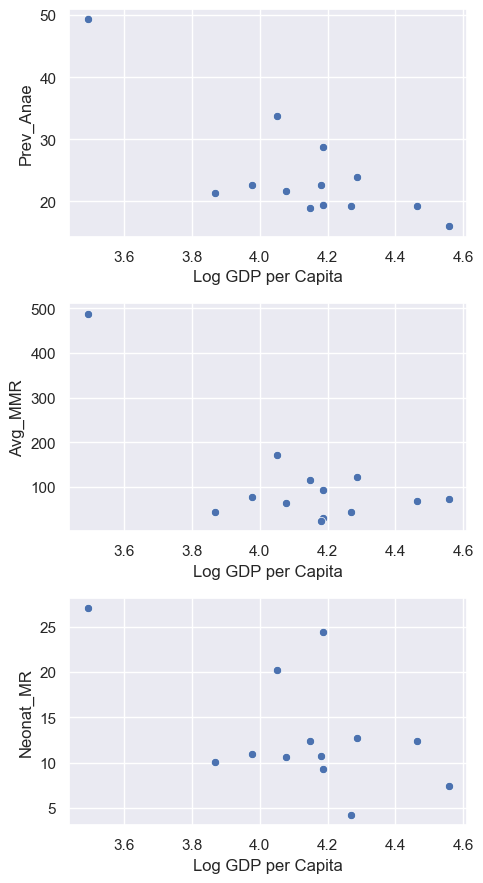

In [11]:
# Influence of GDP on indicators 
gdp_subplots(mch_15, ['Prev_Anae', 'Avg_MMR', 'Neonat_MR'])

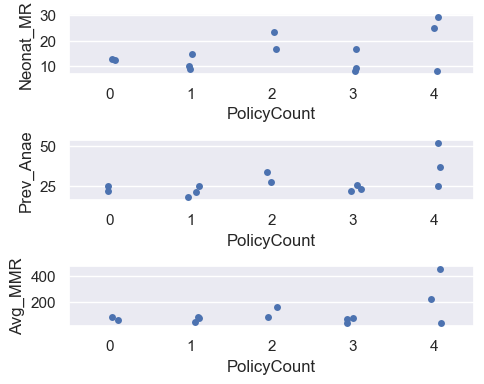

In [12]:
Mch_15ind = add_bool_pol_column(mch_15)
Mch_15ind = extract_6_cols(Mch_05ind, "Country", 'Prev_Anae', 'Avg_MMR', 'Neonat_MR',"PolicyCount","IncomeGroup")

#Influnce of Policy 
plot_strip_subplots(Mch_15ind,["Neonat_MR",'Prev_Anae', 'Avg_MMR'])

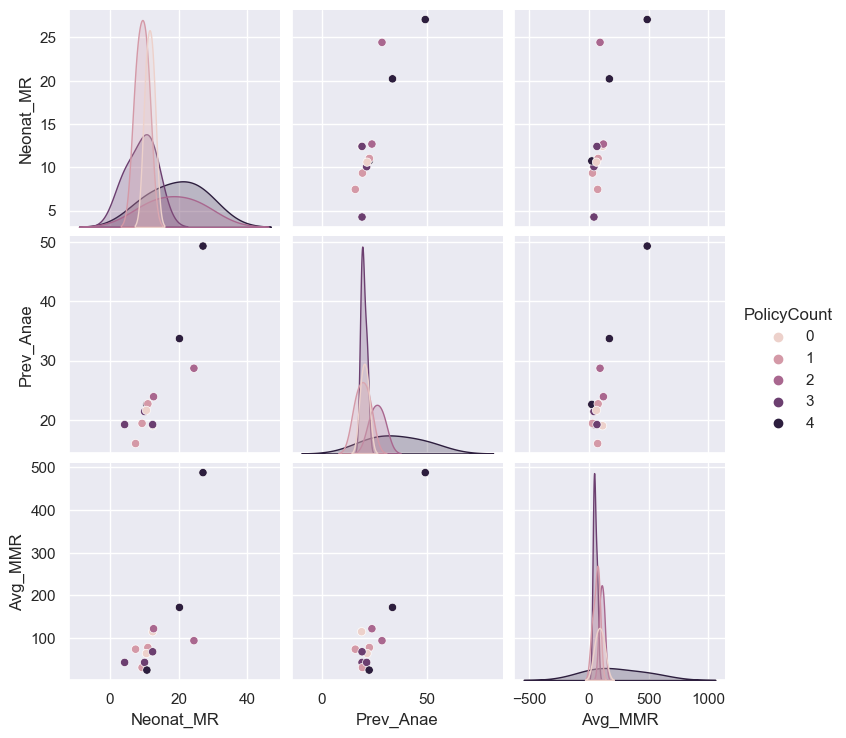

In [14]:
#Creating function to analyse various variables in a pairplot
plot_pairplot(mch_15, ["Neonat_MR",'Prev_Anae', 'Avg_MMR'], hue='PolicyCount')

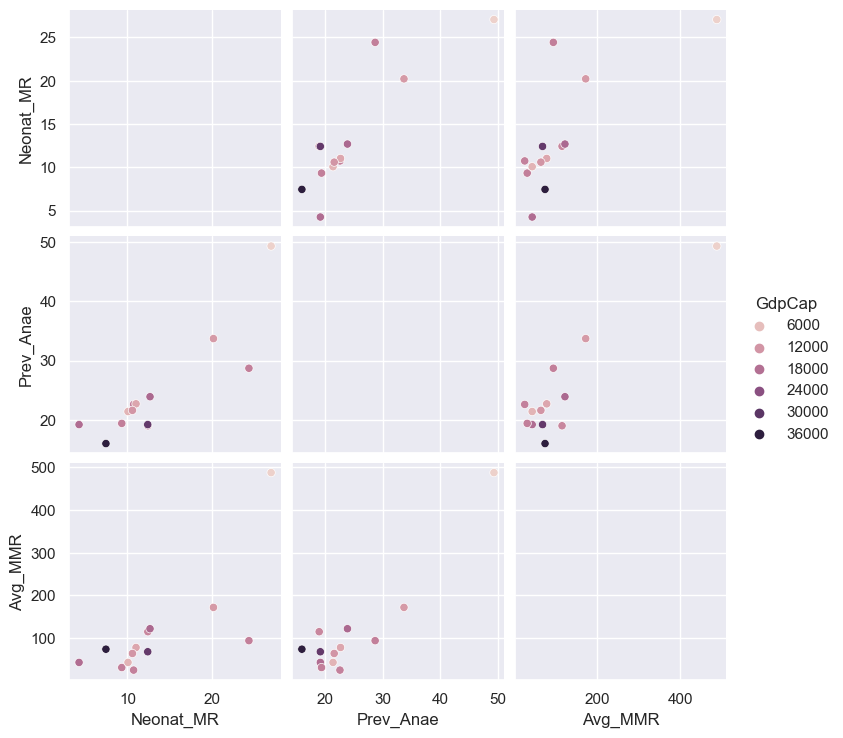

In [13]:
plot_pairplot(mch_15, ["Neonat_MR",'Prev_Anae', 'Avg_MMR'], hue='GdpCap')